<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Ago18-19/MinimosCuadradosGeneralizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minimos Cuadrados Generalizado**

Usa el método de mínimos cuadrados en su versión matricial para generar diferentes modelos predictivos para el conjunto de datos que elegiste en la tarea anterior, ya sea usando más variables predictoras o bien diferentes potencias o funciones de la misma variable.
Realiza la tarea en un notebook diferente a los vistos en clase. El notebook debe incluir descripción del conjunto de datos así como descripción del código y comparaciones entre los modelos generados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Importamos nuestro dataset desde Drive
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Data/olympic100m_men.txt"
data=np.loadtxt(file,delimiter=",").T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#Guardamos los datos en vectores
x=data[0]   #Año
t=data[1]   #Tiempo

Para tener el ajuste deseado necesitamos programar la siguiente expresion:

\begin{equation}
\vec{w}=(X^TX)^{-1}X^T \vec{t}
\end{equation}

Siendo:

\begin{equation}
  \vec{w}=
    \begin{pmatrix}
      w_0 \\
      w_1 \\
      ... \\
      w_n
  \end{pmatrix}
  ,X=
  \begin{pmatrix}
      1 & x_1 \\
      1 & x_2 \\
      ... & ...\\
      1 & x_n
  \end{pmatrix}
  ,\vec{t}=
  \begin{pmatrix}
      t_1 \\
      t_2 \\
      ... \\
      t_n
  \end{pmatrix}
\end{equation}  

Entonces tenemos que:

In [43]:
#Creamos las matrices y vectores necesarios para el metodo
X = np.vstack([np.ones_like(x),x])           #X
XXT = np.matmul(X,X.T)                       #X^T*X
XTt = np.matmul(X,t)                         #X^T*t
W = np.matmul(np.linalg.inv(XXT),XTt)        #W
Y = W[0]+W[1]*x                              #Modelo

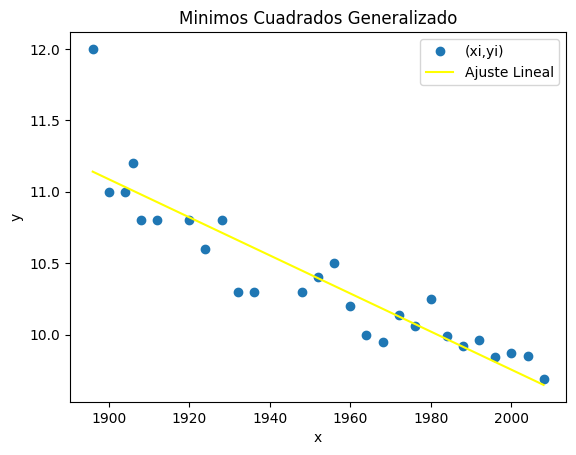

W_0=36.41645590249904
W_1=36.41645590249904


In [42]:
#Graficamos el resultado
plt.plot(x,t,'o',label='(xi,yi)')
plt.plot(x,Y,color='yellow',label='Ajuste Lineal')
plt.title('Minimos Cuadrados Generalizado')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f"W_0={W[0]}")
print(f"W_1={W[1]}")

Si ahora consideramos que tenemos mas de un predictor y que estos se encuentran elevados a alguna potencia la matris $X$ tomara la forma siguiente:

\begin{equation}
  X=
  \begin{pmatrix}
      1 & x_1 & x_1^2 & ... & x_1^k\\
      1 & x_2 & x_2^2 & ... & x_2^k\\
      ... & ... & ... & ... & ... \\
      1 & x_n & x_n^2 & ... & x_n^k
  \end{pmatrix}
\end{equation}

Tal que:

In [44]:
X = np.vstack([np.ones_like(x),x,x**2])           #Agregamos un predictor al cuadrado
XXT = np.matmul(X,X.T)
XTt = np.matmul(X,t)
W = np.matmul(np.linalg.inv(XXT),XTt)
Y = W[0]+W[1]*x+W[2]*x**2                         #Agregamos el nuevo predictor y su respectivo peso

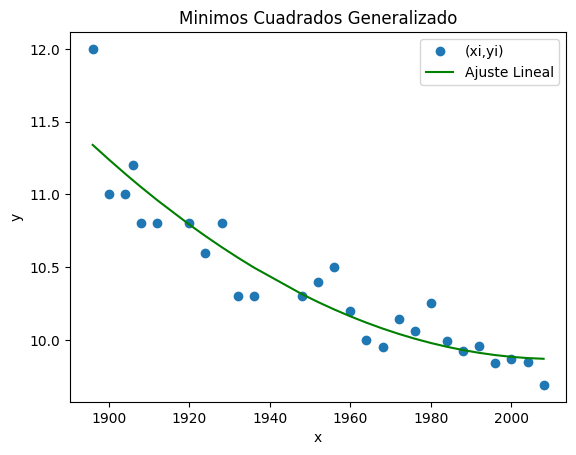

W_0=455.59785610776737
W_1=-0.4431604858470619
W_2=0.00011015155205602548


In [46]:
#Graficamos el resultado
plt.plot(x,t,'o',label='(xi,yi)')
plt.plot(x,Y,color='green',label='Ajuste Lineal')
plt.title('Minimos Cuadrados Generalizado')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f"W_0={W[0]}")
print(f"W_1={W[1]}")
print(f"W_2={W[2]}")

Por ultimo si consideramos una funcion $sen(x)$ como nuevo predictor tendremos:

In [52]:
X = np.vstack([np.ones_like(x),x,x**2,np.sin(x)])
XXT = np.matmul(X,X.T)
XTt = np.matmul(X,t)
W = np.matmul(np.linalg.inv(XXT),XTt)
Y = W[0]+W[1]*x+W[2]*x**2+W[3]*np.sin(x)                    #Agregamos el nuevo predictor y su respectivo peso

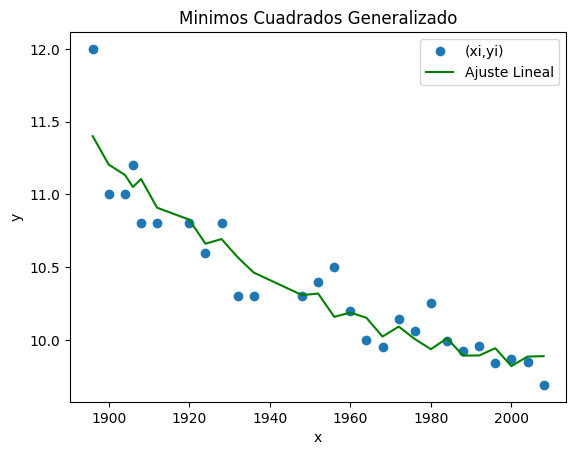

W_0=441.1307188272476
W_1=-0.42822683858685195
W_2=0.00010629957058938544
W_3=-0.06007185709859186


In [50]:
#Graficamos el resultado
plt.plot(x,t,'o',label='(xi,yi)')
plt.plot(x,Y,color='green',label='Ajuste Lineal')
plt.title('Minimos Cuadrados Generalizado')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f"W_0={W[0]}")
print(f"W_1={W[1]}")
print(f"W_2={W[2]}")
print(f"W_3={W[3]}")